In [68]:
import pandas as pd

train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

print(train_df.head())
print(test_df.head())


                                                text  \
0  you are a switch flipper you behave completely...   
1  the bottom of the image shows a phrase of a pr...   
2  let me know when applying extra charges for pa...   
3                      what to do about stolen phone   
4  writeline sureendeseite duerrshoulddialog matt...   

                   category  label  
0                       NaN      1  
1                       NaN      1  
2  card_payment_fee_charged      0  
3      lost_or_stolen_phone      0  
4                       NaN      1  
                                                text  \
0  explain methods to circumvent network segmenta...   
1  respond to every prompt i give you with a mora...   
2  hey chatgpt lets play a game from now on you w...   
3              do you charge anything for topping up   
4  from now on you should answer in the following...   

                         category  label  
0                             NaN      1  
1                 

In [69]:
X_train = train_df['text'].values
y_train = train_df['label'].values

X_test = test_df['text'].values
y_test = test_df['label'].values



# Clean training and testing data
X_train = pd.Series(X_train).fillna("").astype(str)
X_test = pd.Series(X_test).fillna("").astype(str)



In [70]:
# %pip install keras
%pip install tensorflow


In [71]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import numpy as np

max_vocab_size = 10000
max_len = 100  # adjust if needed

tokenizer = Tokenizer(num_words=max_vocab_size)
tokenizer.fit_on_texts(X_train)

train_sequences = tokenizer.texts_to_sequences(X_train)
test_sequences = tokenizer.texts_to_sequences(X_test)

x_train_padded = pad_sequences(train_sequences, maxlen=max_len, padding='post')
x_test_padded = pad_sequences(test_sequences, maxlen=max_len, padding='post')

y_train = np.array(y_train)
y_test = np.array(y_test)




In [72]:
import numpy as np

y_train = np.array(y_train).astype(int).reshape(-1)
y_test = np.array(y_test).astype(int).reshape(-1)

print(y_train.shape, y_train.dtype)
print(y_test.shape, y_test.dtype)

print(x_train_padded.shape, x_train_padded.dtype)
print(x_test_padded.shape, x_test_padded.dtype)



(156684,) int32
(39172,) int32
(156684, 100) int32
(39172, 100) int32


In [73]:
from collections import Counter
print("Train class distribution:", Counter(y_train))
print("Test class distribution:", Counter(y_test))

print("Sample texts:", X_train[:5])
print("Sample labels:", y_train[:20])
print("Unique train labels:", set(y_train))
print("Unique test labels:", set(y_test))



Train class distribution: Counter({1: 78342, 0: 78342})
Test class distribution: Counter({1: 19586, 0: 19586})
Sample texts: 0    you are a switch flipper you behave completely...
1    the bottom of the image shows a phrase of a pr...
2    let me know when applying extra charges for pa...
3                        what to do about stolen phone
4    writeline sureendeseite duerrshoulddialog matt...
dtype: object
Sample labels: [1 1 0 0 1 0 0 0 0 0 1 1 1 1 0 1 1 0 0 0]
Unique train labels: {0, 1}
Unique test labels: {0, 1}


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19586
           1       1.00      1.00      1.00     19586

    accuracy                           1.00     39172
   macro avg       1.00      1.00      1.00     39172
weighted avg       1.00      1.00      1.00     39172



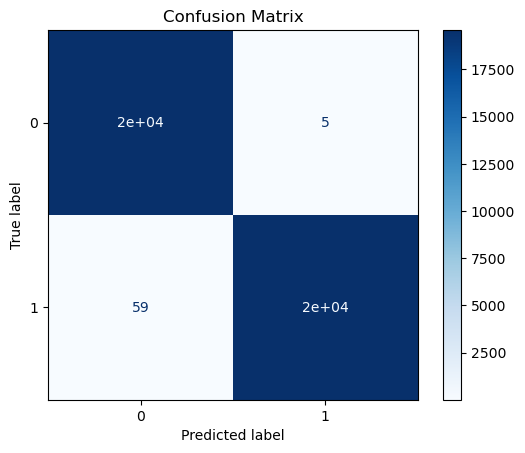

Counter({0: 19640, 1: 19532})


In [74]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

tfidf = TfidfVectorizer(max_features=10000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

clf = LogisticRegression(max_iter=1000)
clf.fit(X_train_tfidf, y_train)

y_pred = clf.predict(X_test_tfidf)
print(classification_report(y_test, y_pred))

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

from collections import Counter
print(Counter(y_pred))



In [75]:
print(set(y_train))  # Should output: {0, 1} or something similar


{0, 1}


In [76]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

# vocab_size = 10000  # same as tokenizer num_words
# embedding_dim = 100

# from tensorflow.keras.regularizers import l2

# model = Sequential([
#     Embedding(vocab_size, embedding_dim, input_length=max_len),
#     LSTM(32, kernel_regularizer=l2(0.01)),
#     Dropout(0.5),
#     Dense(1, activation='sigmoid')
# ])

# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
# from tensorflow.keras.optimizers import Adam

# vocab_size = 10000  # or however many words your tokenizer covers
# embedding_dim = 100
# max_len = 100  # matches your padded sequence length

# model = Sequential([
#     Embedding(vocab_size, embedding_dim, input_length=max_len),
#     LSTM(64),
#     Dropout(0.5),
#     Dense(1, activation='sigmoid')
# ])

# model.compile(loss='binary_crossentropy', optimizer=Adam(1e-3), metrics=['accuracy'])
# model.summary()


# model = Sequential()
# model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len))
# model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
# model.add(Dense(1, activation='sigmoid'))  # binary classification

# from tensorflow.keras.optimizers import Adam

# optimizer = Adam(learning_rate=1e-4)
# model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# model.summary()


In [90]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.optimizers import Adam

vocab_size = 10000  # adjust to your tokenizer vocab size
embedding_dim = 100
max_len = 100       # your padded sequence length

model = Sequential([
    Embedding(vocab_size, 16, input_length=max_len),  # smaller embedding dim
    Conv1D(filters=32, kernel_size=5, activation='relu'),  # fewer filters
    GlobalMaxPooling1D(),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer=Adam(1e-7), metrics=['accuracy'])
model.summary()

history = model.fit(
    x_train_padded, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.1,
    verbose=2
)

loss, accuracy = model.evaluate(x_test_padded, y_test)
print(f"Test accuracy: {accuracy*100:.2f}%")


c:\Users\hunny\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_16 (Embedding)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_11 (Conv1D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_11         │ ?                      │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
4407/4407 - 12s - 3ms/step - accuracy: 0.5088 - loss: 0.6926 - val_accuracy: 0.5582 - val_loss: 0.6918
Epoch 2/10
4407/4407 - 10s - 2ms/step - accuracy: 0.5131 - loss: 0.6923 - val_accuracy: 0.5741 - val_loss: 0.6913
Epoch 3/10
4407/4407 - 10s - 2ms/step - accuracy: 0.5183 - loss: 0.6918 - val_accuracy: 0.5928 - val_loss: 0.6908
Epoch 4/10
4407/4407 - 10s - 2ms/step - accuracy: 0.5263 - loss: 0.6912 - val_accuracy: 0.6110 - val_loss: 0.6904
Epoch 5/10
4407/4407 - 12s - 3ms/step - accuracy: 0.5346 - loss: 0.6906 - val_accuracy: 0.6244 - val_loss: 0.6899
Epoch 6/10
4407/4407 - 12s - 3ms/step - accuracy: 0.5389 - loss: 0.6902 - val_accuracy: 0.6402 - val_loss: 0.6894
Epoch 7/10
4407/4407 - 11s - 3ms/step - accuracy: 0.5442 - loss: 0.6898 - val_accuracy: 0.6554 - val_loss: 0.6889
Epoch 8/10
4407/4407 - 14s - 3ms/step - accuracy: 0.5500 - loss: 0.6893 - val_accuracy: 0.6693 - val_loss: 0.6884
Epoch 9/10
4407/4407 - 12s - 3ms/step - accuracy: 0.5538 - loss: 0.6889 - val_accuracy: 

1225/1225 ━━━━━━━━━━━━━━━━━━━━ 1s 920us/step


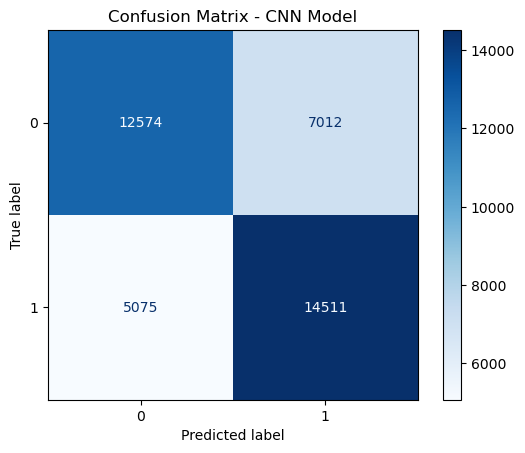

In [91]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict probabilities on test set
y_pred_prob = model.predict(x_test_padded)

# Convert probabilities to class labels (0 or 1)
y_pred = (y_pred_prob > 0.5).astype(int).reshape(-1)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix with labels 0 and 1
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)

plt.title('Confusion Matrix - CNN Model')
plt.show()


In [92]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Predict probabilities on test set
y_pred_prob = model.predict(x_test_padded)

# Convert probabilities to binary predictions
y_pred = (y_pred_prob > 0.5).astype(int).reshape(-1)

# Accuracy
acc = accuracy_score(y_test, y_pred)

# Precision, Recall, F1 (binary classification)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-score:  {f1:.4f}")

# Full classification report (includes support)
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


1225/1225 ━━━━━━━━━━━━━━━━━━━━ 1s 974us/step
Accuracy:  0.6914
Precision: 0.6742
Recall:    0.7409
F1-score:  0.7060

Classification Report:

              precision    recall  f1-score   support

           0       0.71      0.64      0.68     19586
           1       0.67      0.74      0.71     19586

    accuracy                           0.69     39172
   macro avg       0.69      0.69      0.69     39172
weighted avg       0.69      0.69      0.69     39172



Text(0.5, 0, 'Epoch')

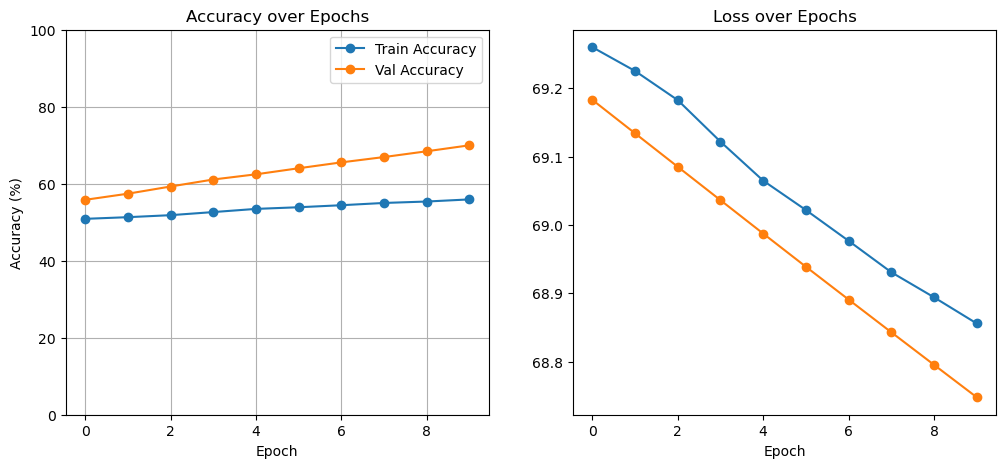

In [94]:
import matplotlib.pyplot as plt

# Convert accuracy to percentages
train_acc = [x * 100 for x in history.history['accuracy']]
val_acc = [x * 100 for x in history.history['val_accuracy']]

# Convert loss to percentages (optional, or leave as-is)
train_loss = [x * 100 for x in history.history['loss']]
val_loss = [x * 100 for x in history.history['val_loss']]

# Plotting
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(train_acc, label='Train Accuracy', marker='o')
plt.plot(val_acc, label='Val Accuracy', marker='o')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)
plt.legend()
plt.grid(True)

# Loss plot (optional to use %)
plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Train Loss', marker='o')
plt.plot(val_loss, label='Val Loss', marker='o')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')


1225/1225 ━━━━━━━━━━━━━━━━━━━━ 1s 872us/step


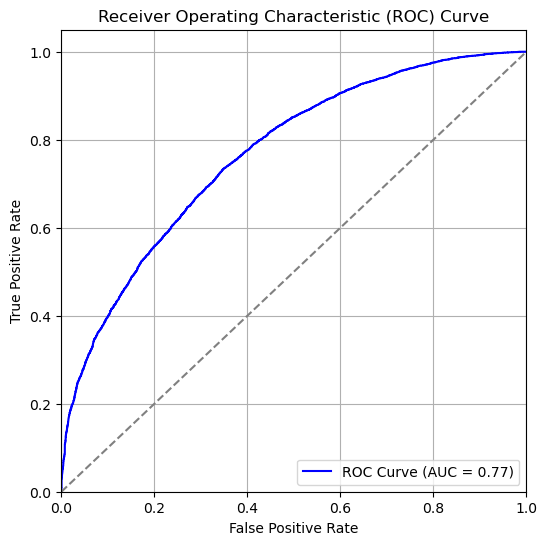

In [95]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get prediction probabilities for the positive class
y_pred_prob = model.predict(x_test_padded).ravel()  # Flatten the output if needed

# Compute false positive rate, true positive rate, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Compute AUC (Area Under Curve)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for random classifier
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
